In [89]:
!pip install pandas
!pip install matplotlib
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import  PorterStemmer, LancasterStemmer, SnowballStemmer
import pandas as pd
import matplotlib.pyplot as plt
from nltk import Text, FreqDist
import numpy as np





In [23]:

# pandas로 정보 불러오기
path = "C:\Classes\project\data project\DA35-3rd-WASD-PetInfo\data_pet_csv\happy_puppy_info.csv"
data = pd.read_csv(path)
data
# 칼럼 3 정보만 셀렉트 하기 
data.columns = ['Rank',"Breed", "Img_src", "Breed_info"]
breed_info = list(data.Breed_info)
type(breed_info)


s = ''.join(str(x) for x in breed_info)
s[:1000]


"The one-of-a-kind French Bulldog, with his large bat ears and even disposition, is one of the world's most popular small-dog breeds, especially among city dwellers. The Frenchie is playful, alert, adaptable, and completely irresistible.\nThe French Bulldog resembles a Bulldog in miniature, except for the large, erect 'bat ears' that are the breed's trademark feature. The head is large and square, with heavy wrinkles rolled above the extremely short nose. The body beneath the smooth, brilliant coat is compact and muscular. The bright, affectionate Frenchie is a charmer. Dogs of few words, Frenchies don't bark much, but their alertness makes them excellent watchdogs. They happily adapt to life with singles, couples, or families, and do not require a lot of outdoor exercise. They get on well with other animals and enjoy making new friends of the human variety. It is no wonder that city folk from Paris to Peoria swear by this vastly amusing and companionable breed.The sweet-faced, lovable

In [10]:

stop_words = stopwords.words("english")
stop_words.extend(['','',''])
result_list = []

[word for word in word_list1 if word.lower() not in stopwords.words('english')]


NameError: name 'word_list1' is not defined

In [24]:
# function으로 tokenize 

def tokenize_text(text):
    """
    전체 문장들을 토큰화해 반환하는 함수
    문장별로 단어 리스트(의미를 파악하는데 중요한 단어들)를 2차원 배열 형태로 반환
    구두점/특수문자, 숫자, 불용어(stop words)들은 모두 제거한다.
    [매개변수]
        text: string - 변환하려는 전체문장
    [반환값]
        2차원 리스트. 1차원: 문장 리스트, 2차원: 문장내 토큰.
    """
    #1. 받은 문장을 모두 소문자로 변환.
    text = text.lower()
    #2. 문장단위 토큰화
    sent_tokens = nltk.sent_tokenize(text)
    #3. 클린징 작업 - 불용어, 특수문자, 숫자 등등을 제거
    ## 불용어사전 loading
    stop_words = stopwords.words("english")
    stop_words.extend([' ', '.']) # 필요하다면 불용어 단어를 추가할 수있다.
    result_list = [] # 최종 결과를 저장할 리스트
    for sent in sent_tokens:  # 한문장씩 처리
        result = nltk.regexp_tokenize(sent, r"[A-Za-z]+")
        # 불용어제거
        result = [word for word in result if word not in stop_words]
        result_list.append(result)
    
    return result_list

In [25]:
result = tokenize_text(s)
result

[['one',
  'kind',
  'french',
  'bulldog',
  'large',
  'bat',
  'ears',
  'even',
  'disposition',
  'one',
  'world',
  'popular',
  'small',
  'dog',
  'breeds',
  'especially',
  'among',
  'city',
  'dwellers'],
 ['frenchie', 'playful', 'alert', 'adaptable', 'completely', 'irresistible'],
 ['french',
  'bulldog',
  'resembles',
  'bulldog',
  'miniature',
  'except',
  'large',
  'erect',
  'bat',
  'ears',
  'breed',
  'trademark',
  'feature'],
 ['head',
  'large',
  'square',
  'heavy',
  'wrinkles',
  'rolled',
  'extremely',
  'short',
  'nose'],
 ['body', 'beneath', 'smooth', 'brilliant', 'coat', 'compact', 'muscular'],
 ['bright', 'affectionate', 'frenchie', 'charmer'],
 ['dogs',
  'words',
  'frenchies',
  'bark',
  'much',
  'alertness',
  'makes',
  'excellent',
  'watchdogs'],
 ['happily',
  'adapt',
  'life',
  'singles',
  'couples',
  'families',
  'require',
  'lot',
  'outdoor',
  'exercise'],
 ['get',
  'well',
  'animals',
  'enjoy',
  'making',
  'new',
  'frie

In [26]:
# 2차원을 1차원으로 변경

this_words = []
for this in result:
    this_words += this

this_words[:100]


['one',
 'kind',
 'french',
 'bulldog',
 'large',
 'bat',
 'ears',
 'even',
 'disposition',
 'one',
 'world',
 'popular',
 'small',
 'dog',
 'breeds',
 'especially',
 'among',
 'city',
 'dwellers',
 'frenchie',
 'playful',
 'alert',
 'adaptable',
 'completely',
 'irresistible',
 'french',
 'bulldog',
 'resembles',
 'bulldog',
 'miniature',
 'except',
 'large',
 'erect',
 'bat',
 'ears',
 'breed',
 'trademark',
 'feature',
 'head',
 'large',
 'square',
 'heavy',
 'wrinkles',
 'rolled',
 'extremely',
 'short',
 'nose',
 'body',
 'beneath',
 'smooth',
 'brilliant',
 'coat',
 'compact',
 'muscular',
 'bright',
 'affectionate',
 'frenchie',
 'charmer',
 'dogs',
 'words',
 'frenchies',
 'bark',
 'much',
 'alertness',
 'makes',
 'excellent',
 'watchdogs',
 'happily',
 'adapt',
 'life',
 'singles',
 'couples',
 'families',
 'require',
 'lot',
 'outdoor',
 'exercise',
 'get',
 'well',
 'animals',
 'enjoy',
 'making',
 'new',
 'friends',
 'human',
 'variety',
 'wonder',
 'city',
 'folk',
 'paris

In [13]:
stemmer = PorterStemmer()
new_words = [stemmer.stem(word) for word in this_words]
new_words

['one',
 'kind',
 'french',
 'bulldog',
 'larg',
 'bat',
 'ear',
 'even',
 'disposit',
 'one',
 'world',
 'popular',
 'small',
 'dog',
 'breed',
 'especi',
 'among',
 'citi',
 'dweller',
 'frenchi',
 'play',
 'alert',
 'adapt',
 'complet',
 'irresist',
 'french',
 'bulldog',
 'resembl',
 'bulldog',
 'miniatur',
 'except',
 'larg',
 'erect',
 'bat',
 'ear',
 'breed',
 'trademark',
 'featur',
 'head',
 'larg',
 'squar',
 'heavi',
 'wrinkl',
 'roll',
 'extrem',
 'short',
 'nose',
 'bodi',
 'beneath',
 'smooth',
 'brilliant',
 'coat',
 'compact',
 'muscular',
 'bright',
 'affection',
 'frenchi',
 'charmer',
 'dog',
 'word',
 'frenchi',
 'bark',
 'much',
 'alert',
 'make',
 'excel',
 'watchdog',
 'happili',
 'adapt',
 'life',
 'singl',
 'coupl',
 'famili',
 'requir',
 'lot',
 'outdoor',
 'exercis',
 'get',
 'well',
 'anim',
 'enjoy',
 'make',
 'new',
 'friend',
 'human',
 'varieti',
 'wonder',
 'citi',
 'folk',
 'pari',
 'peoria',
 'swear',
 'vastli',
 'amus',
 'companion',
 'breed',
 'swee

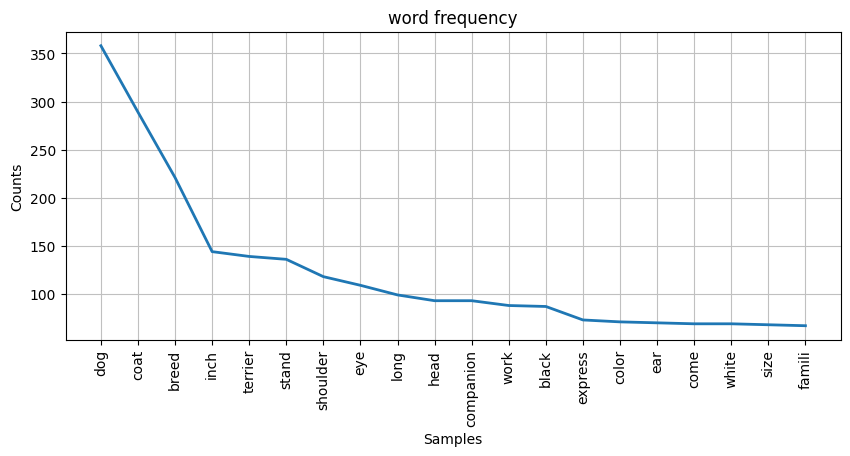

In [27]:
# 그래프로 뽑아서 보기 
puppy_text = Text(new_words, name="강아지")
puppy_text

plt.figure(figsize=(10,4))
plt.title("word frequency")
puppy_text.plot(20)  # 빈도수가 큰 상위 20개 단어에 대해 선그래프를 작성
plt.show()

In [28]:
# frequency 측정해서 보기 
fd = puppy_text.vocab()
fd.pprint()
print("총 토큰수:", fd.N())
print("고유 토큰의 개수:", fd.B())
word = "larg"
print(f"{word}의 빈도수: {fd.get(word)}")
print(f"{word}의 비율: {fd.freq(word)}")


FreqDist({'dog': 358, 'coat': 289, 'breed': 221, 'inch': 144, 'terrier': 139, 'stand': 136, 'shoulder': 118, 'eye': 109, 'long': 99, 'head': 93, ...})
총 토큰수: 16999
고유 토큰의 개수: 2896
larg의 빈도수: 55
larg의 비율: 0.003235484440261192


In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 테스트용 텍스트

text1= """
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

In [18]:
import preprocessing.py

ModuleNotFoundError: No module named 'preprocessing'